<a href="https://colab.research.google.com/github/CSC345DSLoveYou/HousePrice_DSLoveyou/blob/master/HousePricePredictionTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import linear_model


In [ ]:
print(pd.__version__)

1.1.4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfTrain = pd.read_csv("/content/drive/Shared drives/CSC345-DS-Project/house-prices-advanced-regression-techniques/train.csv"
        , sep = ",")
print('%i subjects and %i columns' % dfTrain.shape)
dfTrain.head()

1460 subjects and 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
dfTest = pd.read_csv("/content/drive/Shared drives/CSC345-DS-Project/house-prices-advanced-regression-techniques/test.csv"
        , sep = ",")
print('%i subjects and %i columns' % dfTest.shape)
dfTest.head()

1459 subjects and 80 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print("Shape of train: ", dfTrain.shape)
print("Shape of test: ", dfTest.shape)

Shape of train:  (1460, 81)
Shape of test:  (1459, 80)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 180921.20 and sigma = 79415.29


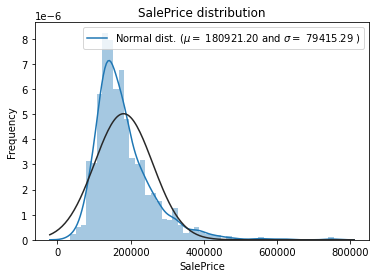

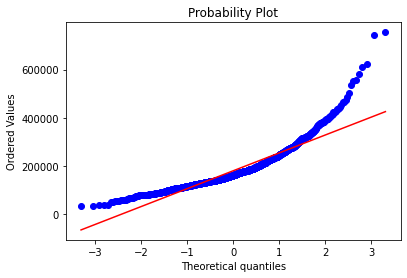

In [ ]:
# target variable

from scipy import stats
from scipy.stats import norm

sns.distplot(dfTrain['SalePrice'] , fit = norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dfTrain['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dfTrain['SalePrice'], plot = plt)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 12.02 and sigma = 0.40


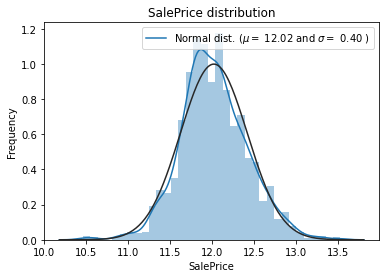

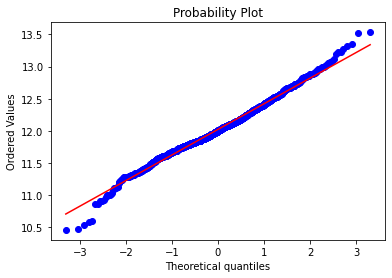

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
dfTrain["SalePrice"] = np.log1p(dfTrain["SalePrice"])

#Check the new distribution 
sns.distplot(dfTrain['SalePrice'] , fit = norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dfTrain['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dfTrain['SalePrice'], plot = plt)
plt.show()

In [ ]:
# making copies of train and test

#Save the 'Id' column
train_ID = dfTrain['Id']
test_ID = dfTest['Id']

# #Now drop the  'Id' colum since it's unnecessary for  the prediction process.
# dfTrain.drop("Id", axis = 1, inplace = True)
# dfTest.drop("Id", axis = 1, inplace = True)

In [ ]:
# combining the train and test datasets for preprocessing

ntrain = dfTrain.shape[0]
ntest =  dfTest.shape[0]

# creating y-train
y_train = dfTrain.SalePrice.values

combine = pd.concat([dfTrain, dfTest])
combine.drop(['SalePrice'], axis = 1, inplace =  True)

# printing the shape of new dataset
combine.shape

(2919, 80)

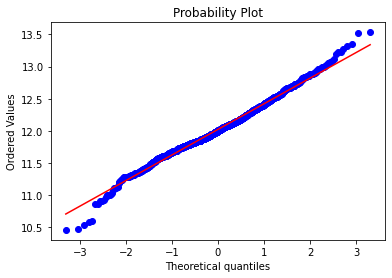

In [ ]:
combine_na = (combine.isnull().sum() / len(combine)) * 100
combine_na = combine_na.drop(combine_na[combine_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :combine_na})
missing_data.head(20)

fig = plt.figure()
res = stats.probplot(dfTrain['SalePrice'], plot = plt)
plt.show()




In [ ]:
# checking is there are any NULL values in the train and test sets
combine.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
# Let us see the columns that contain NaNs
def missing_values():
    temp_dict = dict()
    for i in combine.columns:
        if combine[i].isnull().sum() > 0: 
            temp_dict[i] = combine[i].isnull().sum()
    return temp_dict
            
# missing features and number of NaN in the features 

#missing_values()

# Few columns/decorations have more than 50% of the data points missing, we will discard those columns.
# uncomment the missing_values() functions called above to look them in detail.

In [ ]:
# Deleting the columns which has more than 50% of the missing values
# def delete_columns(col):
#     if combine[col].isnull().sum() > combine[col].count()/2:
#         del combine[col]
# for col in combine.columns:
#     delete_columns(col)
# let us now look at the columns that still have missing values/NaNs
missing_values()

{'Alley': 2721,
 'BsmtCond': 82,
 'BsmtExposure': 82,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtFinType1': 79,
 'BsmtFinType2': 80,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'BsmtQual': 81,
 'BsmtUnfSF': 1,
 'Electrical': 1,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'Fence': 2348,
 'FireplaceQu': 1420,
 'Functional': 2,
 'GarageArea': 1,
 'GarageCars': 1,
 'GarageCond': 159,
 'GarageFinish': 159,
 'GarageQual': 159,
 'GarageType': 157,
 'GarageYrBlt': 159,
 'KitchenQual': 1,
 'LotFrontage': 486,
 'MSZoning': 4,
 'MasVnrArea': 23,
 'MasVnrType': 24,
 'MiscFeature': 2814,
 'PoolQC': 2909,
 'SaleType': 1,
 'TotalBsmtSF': 1,
 'Utilities': 2}

In [ ]:
# ## filling the missing values in the Column Types of BsmtFinSF2

# simply filling the NULL value with none
combine['BsmtFinSF2'].fillna(0, inplace = True)

# checking if there are any Null values left
combine['BsmtFinSF2'].isnull().any()

False

In [ ]:
# ## filling the missing values in the Column Types of BsmtFinSF1

# simply filling the NULL value with none
combine['BsmtFinSF1'].fillna(0, inplace = True)

# checking if there are any Null values left
combine['BsmtFinSF1'].isnull().any()

False

In [ ]:
# ## filling the missing values in the Column Types of BsmtFinType2

# simply filling the NULL value with none
combine['BsmtFinType2'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['BsmtFinType2'].isnull().any()

False

In [ ]:
# ## filling the missing values in the Column Types of BsmtFinType1

# simply filling the NULL value with none
combine['BsmtFinType1'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['BsmtFinType1'].isnull().any()

False

In [ ]:
# ## filling the missing values in the Column Types of BsmtFullBath

# simply filling the NULL value with 0 as it is the most common
combine['BsmtFullBath'].fillna(0, inplace = True)

# checking if there are any Null values left
combine['BsmtFullBath'].isnull().any()

False

In [ ]:
# ## filling the missing values in the Column Types of BsmtHalfBath

# simply filling the NULL value with 0 as it is the most common
combine['BsmtHalfBath'].fillna(0, inplace = True)

# checking if there are any Null values left
combine['BsmtHalfBath'].isnull().any()

False

In [ ]:
# ## filling the missing values in the Column Types of BsmtQual

# simply filling the NULL value with none
combine['BsmtQual'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['BsmtQual'].isnull().any()

False

In [ ]:
# ## filling the missing values in the Column Types of BsmtUnfSF

# simply filling the NULL value with 0 as it is the most common
combine['BsmtUnfSF'].fillna(0, inplace = True)

# checking if there are any Null values left
combine['BsmtUnfSF'].isnull().any()

False

In [ ]:
## filling the missing values in the Column Types of Electrical

# simply filling the NULL value with VinylSd as it is the most common
combine['Electrical'].fillna(combine['Electrical'].mode()[0], inplace = True)

# checking if there are any Null values left
combine['Electrical'].isnull().any()

False

In [ ]:
## filling the missing values in the Column Types of Exterior2nd

# simply filling the NULL value with VinylSd as it is the most common
combine['Exterior1st'].fillna(combine['Exterior1st'].mode()[0], inplace = True)

# checking if there are any Null values left
combine['Exterior1st'].isnull().any()

False

In [ ]:
## filling the missing values in the Column Types of Exterior2nd

# simply filling the NULL value with most common value
combine['Exterior2nd'].fillna(combine['Exterior2nd'].mode()[0], inplace = True)

# checking if there are any Null values left
combine['Exterior2nd'].isnull().any()

False

In [ ]:
## filling the missing values in the Column Types of Fence

# simply filling the NULL value with none
combine['Fence'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['Fence'].isnull().any()

False

In [ ]:
## filling the missing values in the Column Types of FireplaceQu

# simply filling the NULL value with none
combine['FireplaceQu'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['FireplaceQu'].isnull().any()

False

In [ ]:
## filling the missing values in the Column Types of MSZoning

# simply filling the NULL value with none
combine['MSZoning'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['MSZoning'].isnull().any()

False

In [ ]:
## filling the missing values in the Column Types of MasVnrArea

# simply filling the NULL value with 0
combine['MasVnrArea'].fillna(0, inplace = True)

# checking if there are any Null values left
combine['MasVnrArea'].isnull().any()

False

In [ ]:
## filling the missing values in the Column Types of MasVnrType

# simply filling the NULL value with none
combine['MasVnrType'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['MasVnrType'].isnull().any()

False

In [ ]:
## filling the missing values in the Column Types of MiscFeature

# simply filling the NULL value with none
combine['MiscFeature'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['MiscFeature'].isnull().any()

False

In [ ]:
## filling the missing values in the Column Typesof PoolQC

# simply filling the NULL value with Ex as it is the most common
combine['PoolQC'].fillna('None', inplace = True)

# checking if there are any Null values left
combine['PoolQC'].isnull().any()

False

In [ ]:
## filling the missing values in the Column SaleType

# simply filling the NULL value with WD as it is the most common
combine['SaleType'].fillna(combine['SaleType'].mode()[0], inplace = True)

# checking if there are any Null values left
combine['SaleType'].isnull().any()

False

In [ ]:
# filling the missing values in the Column TotalBsmtSF

combine['TotalBsmtSF'].fillna(combine['TotalBsmtSF'].mean(), inplace = True)

# checking if there are any Null values left
combine['TotalBsmtSF'].isnull().any()

False

In [ ]:

# checking the unique value in the column Utlities

combine['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [ ]:
# AS, we just saw that almost all the rows have same value for Utilities we will get rid of this column

combine.drop(['Utilities'], axis = 1, inplace = True)

# checking the new shape of the dataset
combine.shape

(2919, 79)

In [ ]:
# filling the missing values in the LotFrontage column

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
combine["LotFrontage"] = combine.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# checking if there are any NULL values left in the LotFronage Column
combine['LotFrontage'].isnull().any()

False

In [ ]:
# filling the missing values 

# we will replace null values with none
combine['Alley'].fillna('None', inplace = True)

# checking if there are any NULL values left
combine['Alley'].isnull().any()

False

In [ ]:

# filling the missing values in the BsmtCond column

# we are simply filling none in the place NULL values 
combine['BsmtCond'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['BsmtCond'].isnull().any()

False

In [ ]:
# filling the missing values in the BsmtCond column

# replacing No with None
combine['BsmtExposure'].replace(('No'), ('None'), inplace = True)

# we are simply filling None in the place NULL values 
combine['BsmtExposure'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['BsmtExposure'].isnull().any()

False

In [ ]:

combine['KitchenQual'].value_counts(dropna = False)

TA     1492
Gd     1151
Ex      205
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

In [ ]:
# filling the missing values in the KitchenQual column

# we are simply filling TA in the place NULL values 
combine['KitchenQual'].fillna(combine['KitchenQual'].mode()[0], inplace = True)

# checking if there are any left NULL values
combine['KitchenQual'].isnull().any()

False

In [ ]:
# filling the missing values in the GarageYrBlt column

# we are simply filling none in place of NULL values
combine['GarageYrBlt'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['GarageYrBlt'].isnull().any()

False

In [ ]:
# filling the missing values in the GarageType column

# we are simply filling none in the place NULL values 
combine['GarageType'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['GarageType'].isnull().any()

False

In [ ]:
# filling the missing values in the GarageQual column

# we are simply filling none in the place NULL values 
combine['GarageQual'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['GarageQual'].isnull().any()

False

In [ ]:
# filling the missing values in the GarageFinish column

# we are simply filling none in the place NULL values  
combine['GarageFinish'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['GarageFinish'].isnull().any()

False

In [ ]:
# filling the missing values in the GarageCond column

# we are simply filling Unf in the place NULL values 
combine['GarageCond'].fillna('None', inplace = True)

# checking if there are any left NULL values
combine['GarageCond'].isnull().any()

False

In [ ]:

# filling the missing values in the GarageCars column

# we are simply filling 0 in the place NULL values 
combine['GarageCars'].fillna(0, inplace = True)

# checking if there are any left NULL values
combine['GarageCars'].isnull().any()

False

In [ ]:
# filling the missing values in the GarageArea column

# we are simply filling 0 in the place NULL values 
combine['GarageArea'].fillna(0, inplace = True)

# checking if there are any left NULL values
combine['GarageArea'].isnull().any()

False

In [ ]:
# filling the missing values in the Functional column

combine['Functional'].fillna(combine['Functional'].mode()[0], inplace = True)

# checking if there are any left NULL values
combine['Functional'].isnull().any()

False

In [ ]:
combine.isnull().sum().sum()

0

In [ ]:
# Transforming some numerical variables that are really categorical

#MSSubClass=The building class
combine['MSSubClass'] = combine['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
combine['OverallCond'] = combine['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
combine['YrSold'] = combine['YrSold'].astype(str)
combine['MoSold'] = combine['MoSold'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lb = LabelEncoder() 
    lb.fit(list(combine[c].values)) 
    combine[c] = lb.transform(list(combine[c].values))

# shape        
print('Shape all_data: {}'.format(combine.shape))

Shape all_data: (2919, 79)


In [ ]:
# one hot encoding for all the categorical variables

combine = pd.get_dummies(combine)

# checking the head of the dataset
combine.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_2207.0,GarageYrBlt_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,10,65.0,8450,1,1,3,0,7,4,2003,2003,196.0,2,4,2,4,3,2,706.0,6,0.0,150.0,856.0,0,1,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,5,80.0,9600,1,1,3,0,6,7,1976,1976,0.0,3,4,2,4,1,0,978.0,6,0.0,284.0,1262.0,0,1,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,10,68.0,11250,1,1,0,0,7,4,2001,2002,162.0,2,4,2,4,2,2,486.0,6,0.0,434.0,920.0,0,1,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,11,60.0,9550,1,1,0,0,7,4,1915,1970,0.0,3,4,4,1,3,0,216.0,6,0.0,540.0,756.0,2,1,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,10,84.0,14260,1,1,0,0,8,4,2000,2000,350.0,2,4,2,4,0,2,655.0,6,0.0,490.0,1145.0,0,1,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# separating the train and test datasets

x_train = combine.iloc[:ntrain]
x_test = combine.iloc[ntrain:]

# checking the shapes of train and test datasets
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (1460, 325)
Shape of test : (1459, 325)


In [ ]:
#Validation function
n_folds = 5
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    print(rmse)
    return(rmse)

In [ ]:
# LASSO MODEL
# WITH PIPELINE  and using robust scalerTO AVOID SENSITIVITY TOWARDS OUTLIERS

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import Lasso

lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 3))
lasso.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lasso',
                 Lasso(alpha=0.0005, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=3, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[0.10795901 0.14871744 0.13199049 0.10888677 0.18881528]

Lasso score: 0.1373 (0.0299)



In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
#  XG BOOST
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[0.11229897 0.13391852 0.12764554 0.11445574 0.12999442]
Xgboost score: 0.1237 (0.0087)



In [ ]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = np.expm1(model_xgb.predict(x_test))
print(rmsle(y_train, xgb_train_pred))

0.07875476778813223


In [ ]:
# light gradient boosting
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(x_train, y_train)
score = rmsle_cv(model_lgb)
print("light gradient Score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[0.11611523 0.13204656 0.1295911  0.11133451 0.1276041 ]
light gradient Score: 0.1233 (0.0081)



In [ ]:
#  XG BOOST
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[0.11229897 0.13391852 0.12764554 0.11445574 0.12999442]
Xgboost score: 0.1237 (0.0087)



In [ ]:
predictions = model_lgb.fit(x_train, y_train)
print(predictions)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)


In [ ]:
model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_pred = np.expm1(model_lgb.predict(x_test.values))
print(rmsle(y_train, lgb_train_pred))

0.07495332314541717


In [ ]:
# STACKING
# Simplest model -> Averaging Base Models

from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from sklearn.base import TransformerMixin
from sklearn.base import clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

# making a gradint boosting model
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

score = rmsle_cv(GBoost)
print("Gradint boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[0.1118855  0.13952397 0.12853824 0.10664151 0.13218272]
Gradint boosting score: 0.1238 (0.0125)



In [ ]:

# making an Elastic Net model
from sklearn.linear_model import ElasticNet

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ENet.fit(x_train, y_train)

[0.10822753 0.14800258 0.13251392 0.10925602 0.18862583]
ElasticNet score: 0.1373 (0.0297)



Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True,
                            l1_ratio=0.9, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=3,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [ ]:
# KERNEL RIDGE REGRESSION

from sklearn.kernel_ridge import KernelRidge

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.85768e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=5.80756e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.45352e-18): result may not be accurate.
  overwrite_a=False)


[0.65022061 1.12250438 0.48543891 0.29905502 0.39689186]
Kernel Ridge score: 0.5908 (0.2898)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.25229e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=3.88836e-18): result may not be accurate.
  overwrite_a=False)


In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=5.9318e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=6.30249e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.08319e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=8.70361e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.89715e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarni

[0.10850968 0.13571279 0.12577633 0.10383867 0.14762571]
Stacking Averaged models score: 0.1243 (0.0164)


In [ ]:
stacked_averaged_models.fit(x_train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(x_train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(x_test.values))
print(rmsle(y_train, stacked_train_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.38653e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=7.13466e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.31098e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.47445e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.51511e-18): result may not be accurate.
  overwrite_a=False)


0.07215252339372472


In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.85768e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=5.80756e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.45352e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.25229e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=3.88836e-18): result may not be accurate.
  overwrite_a=False)


[0.19647707 0.30540768 0.1797661  0.12505294 0.18258276]
 Averaged base models score: 0.1979 (0.0590)



In [ ]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07069115255907331


In [ ]:
predictions = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
print(predictions)

[122123.59427324 143904.56942071 186182.83358273 ... 167514.37816542
 116684.99424438 214206.56544174]


In [ ]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not

submission = pd.DataFrame({'Id': x_test['Id'],'SalePrice': predictions})

#Visualize the first 5 rows
submission.head()

,Id,SalePrice
0,1461,122123.594273
1,1462,143904.569421
2,1463,186182.833583
3,1464,196098.533516
4,1465,188294.424685


In [ ]:
submission.to_csv('/content/drive/Shared drives/CSC345-DS-Project/output/line_reg04.csv',index=False)